## Data Processing

In [1]:
import numpy as np
import seaborn as sns
import scipy
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv('D:\HKU\STAT4710\Crimes_-_2001_to_Present_20240131.csv')
df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [16]:
# Drop('ID'), drop('Case Number'), drop('FBI Code'), drop('Updated On'), drop('IUCR'), drop('X Coordinate'), drop('Y Coordinate'), drop('Location')
df = df.drop(['ID', 'Case Number', 'FBI Code', 'Updated On', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Location'], axis=1)
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
0,03/18/2015 12:00:00 PM,0000X W WACKER DR,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,111,1.0,42.0,32.0,2015,NaN,NaN
1,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,2515,25.0,36.0,19.0,2018,NaN,NaN
2,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,2016,NaN,NaN
3,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,17.0,33.0,14.0,2018,NaN,NaN
4,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2222,22.0,21.0,71.0,2014,NaN,NaN


In [17]:
# Drop rows with missing values
df = df.dropna()
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude
11,05/07/2020 10:24:00 AM,035XX S INDIANA AVE,THEFT,$500 AND UNDER,APARTMENT,False,False,212,2.0,3.0,35.0,2020,41.830482,-87.621752
12,04/16/2020 05:00:00 AM,005XX W 32ND ST,BATTERY,SIMPLE,APARTMENT,True,False,915,9.0,11.0,60.0,2020,41.836310,-87.639624
13,07/01/2020 10:16:00 AM,081XX S COLES AVE,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,422,4.0,7.0,46.0,2020,41.747610,-87.549179
14,09/27/2020 11:29:00 PM,065XX S WOLCOTT AVE,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,726,7.0,15.0,67.0,2020,41.774878,-87.671375
15,07/10/2005 03:00:00 PM,062XX S ABERDEEN ST,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,712,7.0,16.0,68.0,2005,41.781003,-87.652107


In [18]:
# Print distinct values in Primary Types
print(df['Primary Type'].unique())

['THEFT' 'BATTERY' 'ASSAULT' 'WEAPONS VIOLATION' 'OTHER OFFENSE'
 'INTERFERENCE WITH PUBLIC OFFICER' 'BURGLARY' 'NARCOTICS'
 'MOTOR VEHICLE THEFT' 'CRIMINAL DAMAGE' 'DECEPTIVE PRACTICE'
 'OFFENSE INVOLVING CHILDREN' 'CRIMINAL TRESPASS' 'ROBBERY' 'SEX OFFENSE'
 'PUBLIC PEACE VIOLATION' 'CRIMINAL SEXUAL ASSAULT' 'PROSTITUTION'
 'STALKING' 'HOMICIDE' 'KIDNAPPING' 'ARSON'
 'CONCEALED CARRY LICENSE VIOLATION' 'GAMBLING' 'LIQUOR LAW VIOLATION'
 'INTIMIDATION' 'CRIM SEXUAL ASSAULT' 'OBSCENITY' 'PUBLIC INDECENCY'
 'NON-CRIMINAL' 'HUMAN TRAFFICKING' 'OTHER NARCOTIC VIOLATION' 'RITUALISM'
 'NON-CRIMINAL (SUBJECT SPECIFIED)' 'NON - CRIMINAL']


In [19]:
# Count the number of Primary Types
df['Primary Type'].value_counts()

Primary Type
THEFT                                1544193
BATTERY                              1333915
CRIMINAL DAMAGE                       835034
NARCOTICS                             673082
ASSAULT                               483236
OTHER OFFENSE                         452143
BURGLARY                              395906
MOTOR VEHICLE THEFT                   361078
DECEPTIVE PRACTICE                    314525
ROBBERY                               276771
CRIMINAL TRESPASS                     199481
WEAPONS VIOLATION                     106888
PROSTITUTION                           61472
OFFENSE INVOLVING CHILDREN             50693
PUBLIC PEACE VIOLATION                 49347
SEX OFFENSE                            27410
CRIM SEXUAL ASSAULT                    24041
INTERFERENCE WITH PUBLIC OFFICER       18260
GAMBLING                               13418
LIQUOR LAW VIOLATION                   12920
HOMICIDE                               12661
ARSON                                  122

In [20]:
# Drop some crime types = 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL', 'NON - CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION', 'DOMESTIC VIOLENCE', 'PUBLIC INDECENCY', 'OBSCENITY', 'RITUALISM'
df = df[~df['Primary Type'].isin(['NON-CRIMINAL (SUBJECT SPECIFIED)', 'NON-CRIMINAL', 'NON - CRIMINAL', 'CONCEALED CARRY LICENSE VIOLATION', 'DOMESTIC VIOLENCE', 'PUBLIC INDECENCY', 'OBSCENITY', 'RITUALISM'])]
df['Primary Type'].value_counts()

Primary Type
THEFT                               1544193
BATTERY                             1333915
CRIMINAL DAMAGE                      835034
NARCOTICS                            673082
ASSAULT                              483236
OTHER OFFENSE                        452143
BURGLARY                             395906
MOTOR VEHICLE THEFT                  361078
DECEPTIVE PRACTICE                   314525
ROBBERY                              276771
CRIMINAL TRESPASS                    199481
WEAPONS VIOLATION                    106888
PROSTITUTION                          61472
OFFENSE INVOLVING CHILDREN            50693
PUBLIC PEACE VIOLATION                49347
SEX OFFENSE                           27410
CRIM SEXUAL ASSAULT                   24041
INTERFERENCE WITH PUBLIC OFFICER      18260
GAMBLING                              13418
LIQUOR LAW VIOLATION                  12920
HOMICIDE                              12661
ARSON                                 12271
CRIMINAL SEXUAL ASS

In [21]:
# Combine NARCOTICS and OTHER NARCOTIC VIOLATION
df['Primary Type'] = df['Primary Type'].replace('OTHER NARCOTIC VIOLATION', 'NARCOTICS')

# Combine SEX OFFENSE and CRIM SEXUAL ASSAULT
df['Primary Type'] = df['Primary Type'].replace('CRIM SEXUAL ASSAULT', 'SEX OFFENSE')
df['Primary Type'] = df['Primary Type'].replace('CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE')

df['Primary Type'].value_counts()

Primary Type
THEFT                               1544193
BATTERY                             1333915
CRIMINAL DAMAGE                      835034
NARCOTICS                            673219
ASSAULT                              483236
OTHER OFFENSE                        452143
BURGLARY                             395906
MOTOR VEHICLE THEFT                  361078
DECEPTIVE PRACTICE                   314525
ROBBERY                              276771
CRIMINAL TRESPASS                    199481
WEAPONS VIOLATION                    106888
PROSTITUTION                          61472
SEX OFFENSE                           58651
OFFENSE INVOLVING CHILDREN            50693
PUBLIC PEACE VIOLATION                49347
INTERFERENCE WITH PUBLIC OFFICER      18260
GAMBLING                              13418
LIQUOR LAW VIOLATION                  12920
HOMICIDE                              12661
ARSON                                 12271
KIDNAPPING                             6121
STALKING           

In [24]:
# 在dataframe中加入新的column 'UCR_PART'，它的值都为NaN
df['UCR_PART'] = np.nan
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,Year,Latitude,Longitude,UCR_PART
11,05/07/2020 10:24:00 AM,035XX S INDIANA AVE,THEFT,$500 AND UNDER,APARTMENT,False,False,212,2.0,3.0,35.0,2020,41.830482,-87.621752,NaN
12,04/16/2020 05:00:00 AM,005XX W 32ND ST,BATTERY,SIMPLE,APARTMENT,True,False,915,9.0,11.0,60.0,2020,41.836310,-87.639624,NaN
13,07/01/2020 10:16:00 AM,081XX S COLES AVE,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,422,4.0,7.0,46.0,2020,41.747610,-87.549179,NaN
14,09/27/2020 11:29:00 PM,065XX S WOLCOTT AVE,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,726,7.0,15.0,67.0,2020,41.774878,-87.671375,NaN
15,07/10/2005 03:00:00 PM,062XX S ABERDEEN ST,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,712,7.0,16.0,68.0,2005,41.781003,-87.652107,NaN


In [25]:
# Change the UCR_PART value of THEFT, BATTERY, ASSAULT, BURGLARY, MOTOR VEHICLE THEFT, CRIMINAL DAMAGE, ROBBERY, HOMICIDE, ARSON as "UCR_PART_I"
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'THEFT', 'UCR_PART_I')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'BATTERY', 'UCR_PART_I')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'ASSAULT', 'UCR_PART_I')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'BURGLARY', 'UCR_PART_I')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'MOTOR VEHICLE THEFT', 'UCR_PART_I')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'CRIMINAL DAMAGE', 'UCR_PART_I')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'ROBBERY', 'UCR_PART_I')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'HOMICIDE', 'UCR_PART_I')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'ARSON', 'UCR_PART_I')

# Change the UCR_PART value of WEAPONS VIOLATION, OTHER OFFENSE, INTERFERENCE WITH PUBLIC OFFICER, NARCOTICS, DECEPTIVE PRACTICE, OFFENSE INVOLVING CHILDREN, CRIMINAL TRESPASS, SEX OFFENSE, PUBLIC PEACE VIOLATION, PROSTITUTION, STALKING, KIDNAPPING, GAMBLING, LIQUOR LAW VIOLATION, INTIMIDATION, HUMAN TRAFFICKING as "UCR_PART_II"
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'WEAPONS VIOLATION', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'OTHER OFFENSE', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'INTERFERENCE WITH PUBLIC OFFICER', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'NARCOTICS', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'DECEPTIVE PRACTICE', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'OFFENSE INVOLVING CHILDREN', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'CRIMINAL TRESPASS', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'SEX OFFENSE', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'PUBLIC PEACE VIOLATION', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'PROSTITUTION', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'STALKING', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'KIDNAPPING', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'GAMBLING', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'LIQUOR LAW VIOLATION', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'INTIMIDATION', 'UCR_PART_II')
df['UCR_PART'] = df['UCR_PART'].mask(df['Primary Type'] == 'HUMAN TRAFFICKING', 'UCR_PART_II')

df['UCR_PART'].value_counts()

UCR_PART
UCR_PART_I     5255065
UCR_PART_II    2026492
Name: count, dtype: int64

In [26]:
# Covert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %I:%M:%S %p')

# Extract year, month, day
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

# Extract time blocks
df['Hour'] = df['Date'].dt.hour
df['Minute'] = df['Date'].dt.minute
df['Second'] = df['Date'].dt.second
df['Time'] = pd.cut(df['Hour'], bins=[0, 7, 13, 19, 24], labels=['Early Morning', 'Late Morning', 'Afternoon', 'Night'])

df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Year,Latitude,Longitude,UCR_PART,Month,Day,Hour,Minute,Second,Time
11,2020-05-07 10:24:00,035XX S INDIANA AVE,THEFT,$500 AND UNDER,APARTMENT,False,False,212,2.0,3.0,...,2020,41.830482,-87.621752,UCR_PART_I,5,7,10,24,0,Late Morning
12,2020-04-16 05:00:00,005XX W 32ND ST,BATTERY,SIMPLE,APARTMENT,True,False,915,9.0,11.0,...,2020,41.836310,-87.639624,UCR_PART_I,4,16,5,0,0,Early Morning
13,2020-07-01 10:16:00,081XX S COLES AVE,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,422,4.0,7.0,...,2020,41.747610,-87.549179,UCR_PART_I,7,1,10,16,0,Late Morning
14,2020-09-27 23:29:00,065XX S WOLCOTT AVE,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,726,7.0,15.0,...,2020,41.774878,-87.671375,UCR_PART_I,9,27,23,29,0,Night
15,2005-07-10 15:00:00,062XX S ABERDEEN ST,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,712,7.0,16.0,...,2005,41.781003,-87.652107,UCR_PART_I,7,10,15,0,0,Afternoon


In [27]:
df['Weekday'] = df['Date'].dt.dayofweek
df['Weekday'] = df['Weekday'].replace({0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'})
df.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Latitude,Longitude,UCR_PART,Month,Day,Hour,Minute,Second,Time,Weekday
11,2020-05-07 10:24:00,035XX S INDIANA AVE,THEFT,$500 AND UNDER,APARTMENT,False,False,212,2.0,3.0,...,41.830482,-87.621752,UCR_PART_I,5,7,10,24,0,Late Morning,Thursday
12,2020-04-16 05:00:00,005XX W 32ND ST,BATTERY,SIMPLE,APARTMENT,True,False,915,9.0,11.0,...,41.836310,-87.639624,UCR_PART_I,4,16,5,0,0,Early Morning,Thursday
13,2020-07-01 10:16:00,081XX S COLES AVE,ASSAULT,AGGRAVATED - HANDGUN,STREET,True,False,422,4.0,7.0,...,41.747610,-87.549179,UCR_PART_I,7,1,10,16,0,Late Morning,Wednesday
14,2020-09-27 23:29:00,065XX S WOLCOTT AVE,BATTERY,SIMPLE,RESIDENCE - PORCH / HALLWAY,False,False,726,7.0,15.0,...,41.774878,-87.671375,UCR_PART_I,9,27,23,29,0,Night,Sunday
15,2005-07-10 15:00:00,062XX S ABERDEEN ST,BATTERY,AGGRAVATED: OTHER DANG WEAPON,STREET,False,False,712,7.0,16.0,...,41.781003,-87.652107,UCR_PART_I,7,10,15,0,0,Afternoon,Sunday


In [28]:
df.columns

Index(['Date', 'Block', 'Primary Type', 'Description', 'Location Description',
       'Arrest', 'Domestic', 'Beat', 'District', 'Ward', 'Community Area',
       'Year', 'Latitude', 'Longitude', 'UCR_PART', 'Month', 'Day', 'Hour',
       'Minute', 'Second', 'Time', 'Weekday'],
      dtype='object')

In [29]:
df = df.drop(['Date', 'Description', 'Domestic', 'Hour', 'Minute', 'Second'], axis=1)
df.head()

,Block,Primary Type,Location Description,Arrest,Beat,District,Ward,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
11,035XX S INDIANA AVE,THEFT,APARTMENT,False,212,2.0,3.0,35.0,2020,41.830482,-87.621752,UCR_PART_I,5,7,Late Morning,Thursday
12,005XX W 32ND ST,BATTERY,APARTMENT,True,915,9.0,11.0,60.0,2020,41.836310,-87.639624,UCR_PART_I,4,16,Early Morning,Thursday
13,081XX S COLES AVE,ASSAULT,STREET,True,422,4.0,7.0,46.0,2020,41.747610,-87.549179,UCR_PART_I,7,1,Late Morning,Wednesday
14,065XX S WOLCOTT AVE,BATTERY,RESIDENCE - PORCH / HALLWAY,False,726,7.0,15.0,67.0,2020,41.774878,-87.671375,UCR_PART_I,9,27,Night,Sunday
15,062XX S ABERDEEN ST,BATTERY,STREET,False,712,7.0,16.0,68.0,2005,41.781003,-87.652107,UCR_PART_I,7,10,Afternoon,Sunday


In [34]:
# Print distinct values in Location Description
print(len(df['Location Description'].unique()))

200


In [35]:
df = df.drop(['Location Description', 'Arrest', 'Beat'], axis=1)
df.head()

,Block,Primary Type,District,Ward,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
11,035XX S INDIANA AVE,THEFT,2.0,3.0,35.0,2020,41.830482,-87.621752,UCR_PART_I,5,7,Late Morning,Thursday
12,005XX W 32ND ST,BATTERY,9.0,11.0,60.0,2020,41.836310,-87.639624,UCR_PART_I,4,16,Early Morning,Thursday
13,081XX S COLES AVE,ASSAULT,4.0,7.0,46.0,2020,41.747610,-87.549179,UCR_PART_I,7,1,Late Morning,Wednesday
14,065XX S WOLCOTT AVE,BATTERY,7.0,15.0,67.0,2020,41.774878,-87.671375,UCR_PART_I,9,27,Night,Sunday
19,081XX S LOOMIS BLVD,WEAPONS VIOLATION,6.0,21.0,71.0,2020,41.746221,-87.658477,UCR_PART_II,8,4,Night,Tuesday


In [36]:
# Extract the dataset from 2014 to 2023 
df = df[(df['Year'] >= 2014) & (df['Year'] <= 2023)]

# Save the cleaned dataset
df.to_csv('D:\HKU\STAT4710\dataset_cleaned.csv', index=False)

## EDA - Data Visualization

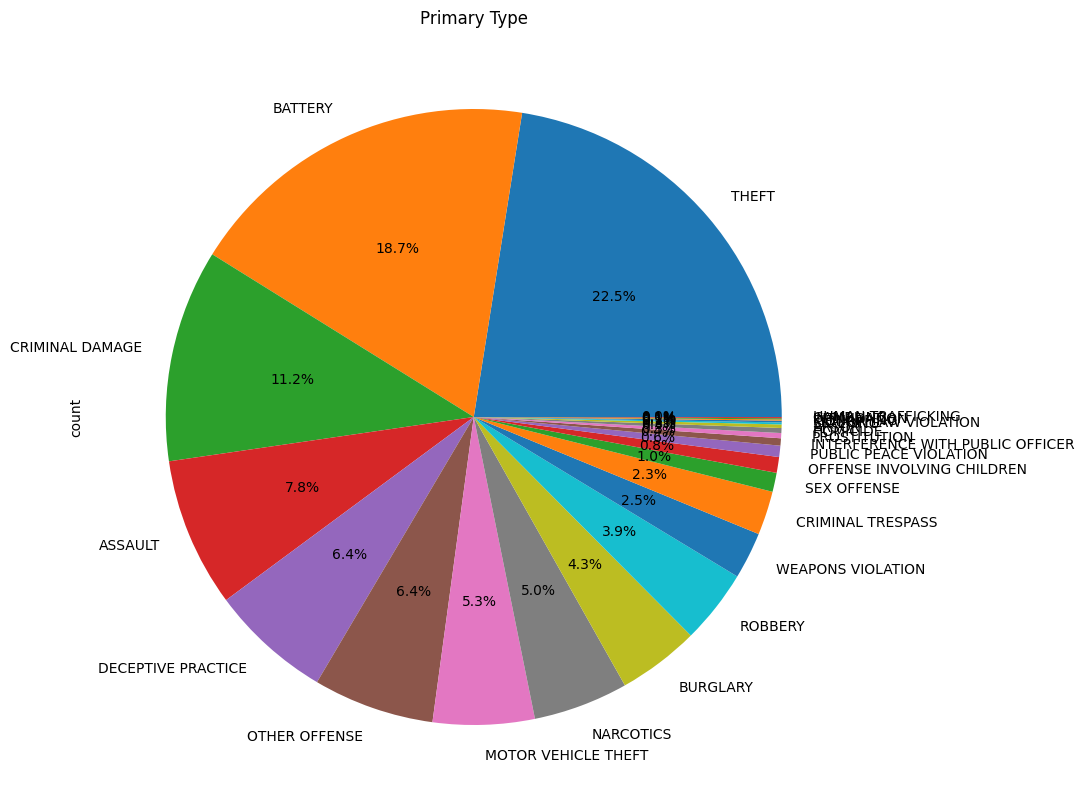

In [31]:
# Pie chart
plt.figure(figsize=(10, 10))
df['Primary Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Primary Type')
plt.show()

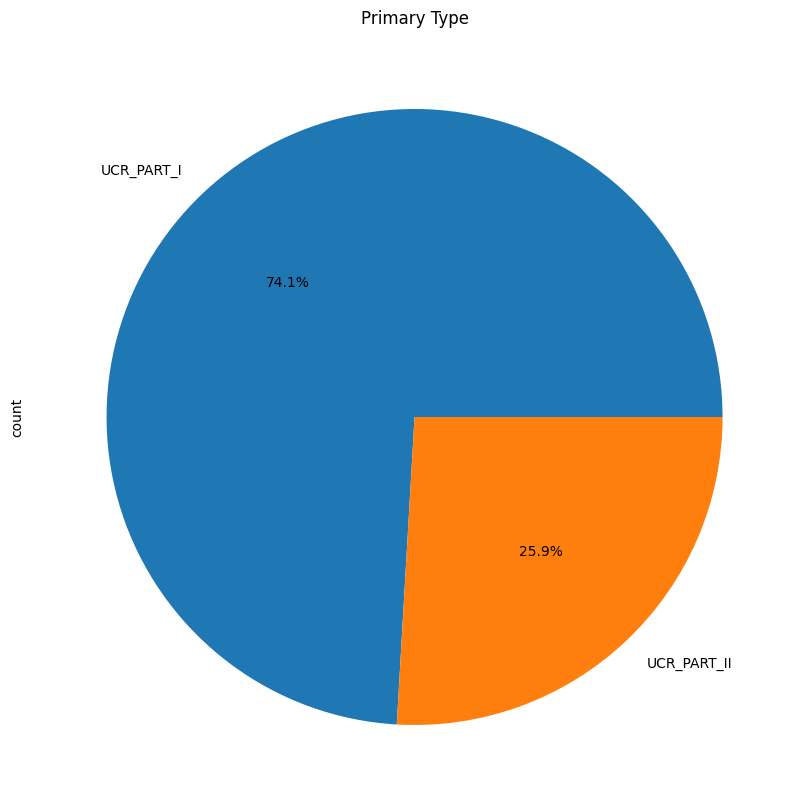

In [32]:
# Pie chart
plt.figure(figsize=(10, 10))
df['UCR_PART'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Primary Type')
plt.show()

## Feacture Selection

In [2]:
df = pd.read_csv('D:\HKU\STAT4710\dataset_cleaned.csv')
df.head()

,Block,Primary Type,District,Ward,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
0,035XX S INDIANA AVE,THEFT,2.0,3.0,35.0,2020,41.830482,-87.621752,UCR_PART_I,5,7,Late Morning,Thursday
1,005XX W 32ND ST,BATTERY,9.0,11.0,60.0,2020,41.836310,-87.639624,UCR_PART_I,4,16,Early Morning,Thursday
2,081XX S COLES AVE,ASSAULT,4.0,7.0,46.0,2020,41.747610,-87.549179,UCR_PART_I,7,1,Late Morning,Wednesday
3,065XX S WOLCOTT AVE,BATTERY,7.0,15.0,67.0,2020,41.774878,-87.671375,UCR_PART_I,9,27,Night,Sunday
4,081XX S LOOMIS BLVD,WEAPONS VIOLATION,6.0,21.0,71.0,2020,41.746221,-87.658477,UCR_PART_II,8,4,Night,Tuesday


In [3]:
# Label Encoding categorical variables
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Block'] = labelencoder.fit_transform(df['Block'])
df['Primary Type'] = labelencoder.fit_transform(df['Primary Type'])
df['District'] = labelencoder.fit_transform(df['District'])
df['Ward'] = labelencoder.fit_transform(df['Ward'])
df['Community Area'] = labelencoder.fit_transform(df['Community Area'])
df['Time'] = labelencoder.fit_transform(df['Time'])
df['Weekday'] = labelencoder.fit_transform(df['Weekday'])
df['UCR_PART'] = labelencoder.fit_transform(df['UCR_PART'])

df.dtypes

Block               int32
Primary Type        int32
District            int64
Ward                int64
Community Area      int64
Year                int64
Latitude          float64
Longitude         float64
UCR_PART            int32
Month               int64
Day                 int64
Time                int32
Weekday             int32
dtype: object

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

#taking a fraction of data
data_sample = df.sample(frac=0.1, random_state=1)
model = ExtraTreesClassifier()
X = data_sample.drop(['UCR_PART'], axis=1)
y = data_sample['UCR_PART']
model.fit(X, y)

print(model.feature_importances_)

[0.02781509 0.74726274 0.01463049 0.01866237 0.01803887 0.02503461
 0.03016773 0.03166512 0.02185408 0.02442577 0.02093376 0.01950936]


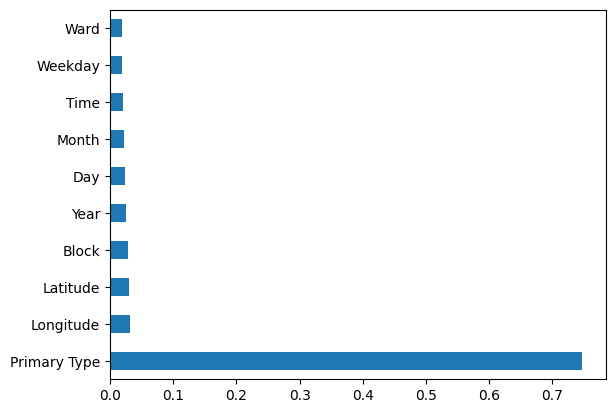

In [11]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [41]:
corelation = df.corr()
corelation

,Block,Primary Type,District,Ward,Community Area,Year,Latitude,Longitude,UCR_PART,Month,Day,Time,Weekday
Block,1.000000,-0.085811,-0.099411,-0.182479,0.374067,-0.007570,-0.351683,0.077964,-0.005226,-0.004478,-0.002418,0.022696,0.005834
Primary Type,-0.085811,1.000000,0.032485,0.060181,-0.077634,-0.001370,0.079112,0.003818,0.152316,0.008527,-0.001193,-0.017667,0.000695
District,-0.099411,0.032485,1.000000,0.666690,-0.489751,0.003543,0.634371,-0.552773,0.003556,0.003804,-0.002573,0.005528,-0.005125
Ward,-0.182479,0.060181,0.666690,1.000000,-0.530739,0.007647,0.664520,-0.449997,0.007021,0.003982,-0.001939,-0.010567,-0.005564
Community Area,0.374067,-0.077634,-0.489751,-0.530739,1.000000,-0.013642,-0.766182,0.233616,0.009341,-0.008973,0.000725,0.010988,0.006432
Year,-0.007570,-0.001370,0.003543,0.007647,-0.013642,1.000000,0.012073,0.020278,-0.044838,0.009888,-0.002822,0.015053,0.001348
Latitude,-0.351683,0.079112,0.634371,0.664520,-0.766182,0.012073,1.000000,-0.518712,-0.005045,0.006910,-0.001493,-0.008630,-0.004420
Longitude,0.077964,0.003818,-0.552773,-0.449997,0.233616,0.020278,-0.518712,1.000000,-0.048721,0.004538,0.003689,-0.010129,-0.000434
UCR_PART,-0.005226,0.152316,0.003556,0.007021,0.009341,-0.044838,-0.005045,-0.048721,1.000000,-0.037956,-0.016167,0.038146,0.005416
Month,-0.004478,0.008527,0.003804,0.003982,-0.008973,0.009888,0.006910,0.004538,-0.037956,1.000000,-0.002709,0.001577,-0.000262


<Axes: >

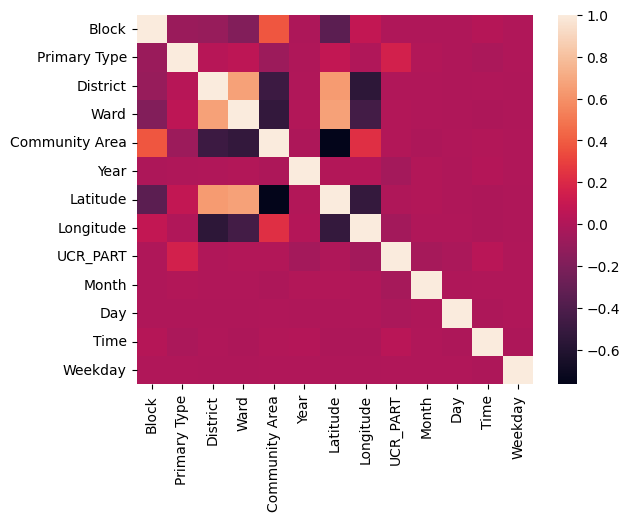

In [42]:
sns.heatmap(corelation)

Only Time Features

In [5]:
Time_Features = ['Year', 'Month', 'Day', 'Time', 'Weekday']

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df[Time_Features], df['UCR_PART'], test_size=0.3, random_state=1)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
pred_train = knn_5.predict(X_train)
y_pred = knn_5.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Test accuracy  0.695845621373626
Accuracy  0.691344221898014
F1 score  0.6490756498322501


In [10]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
pred_train = decision_tree.predict(X_train)
y_pred = decision_tree.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7404501364314159
F1 score  0.6353593373313033


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7403199460985178
F1 score  0.6356897998112967


Only Space Features

'Block'

In [11]:
Space_Features1 = ['Block']

X_train, X_test, y_train, y_test = train_test_split(df[Space_Features1], df['UCR_PART'], test_size=0.3, random_state=1)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
pred_train = knn_5.predict(X_train)
y_pred = knn_5.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7021017014668558
F1 score  0.6666409969818381


In [12]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
pred_train = decision_tree.predict(X_train)
y_pred = decision_tree.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7458080726059407
F1 score  0.6684776445773748


In [50]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7451624896149721
F1 score  0.6693120549003438


'District'

In [13]:
from sklearn.tree import DecisionTreeClassifier

Space_Features2 = ['District']
X_train, X_test, y_train, y_test = train_test_split(df[Space_Features2], df['UCR_PART'], test_size=0.3, random_state=1)

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
pred_train = decision_tree.predict(X_train)
y_pred = decision_tree.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7406420665098119
F1 score  0.6303272544266632


In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7403199460985178
F1 score  0.6356897998112967


'Ward'

In [14]:
Space_Features3 = ['Ward']

X_train, X_test, y_train, y_test = train_test_split(df[Space_Features3], df['UCR_PART'], test_size=0.3, random_state=1)

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
pred_train = decision_tree.predict(X_train)
y_pred = decision_tree.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7406380400046707
F1 score  0.6302800394968827


In [16]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7406380400046707
F1 score  0.6302800394968827


'Community Area'

In [17]:
Space_Features4 = ['Community Area']

X_train, X_test, y_train, y_test = train_test_split(df[Space_Features4], df['UCR_PART'], test_size=0.3, random_state=1)

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
pred_train = decision_tree.predict(X_train)
y_pred = decision_tree.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7406380400046707
F1 score  0.6302800394968827


In [18]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7406380400046707
F1 score  0.6302800394968827


'Latitude & Longitude'

In [19]:
Space_Features5 = ['Latitude', 'Longitude']

X_train, X_test, y_train, y_test = train_test_split(df[Space_Features5], df['UCR_PART'], test_size=0.3, random_state=1)

decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)
pred_train = decision_tree.predict(X_train)
y_pred = decision_tree.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7284860474886017
F1 score  0.6888603340433377


In [20]:
rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7236367931302453
F1 score  0.6900320853530659


## KNN Classifier

In [4]:
Selected_Features = ['Year', 'Month', 'Day', 'Time', 'Weekday', 'Latitude', 'Longitude']

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(df[Selected_Features], df['UCR_PART'], test_size=0.3, random_state=1)

knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train)
pred_train = knn_5.predict(X_train)
y_pred = knn_5.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Test accuracy  0.7829660295005002
Accuracy  0.6987221214850288
F1 score  0.6634605402066641


In [27]:
# Deploy Elbow method to get optimum number of neighbours
error_rate = []
k_range = range(10,50,5)
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_train = knn.predict(X_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))
    print('Neighbours ',i)
    print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
    print('Accuracy ', metrics.accuracy_score(y_test, pred_i))
    print('F1 score ', metrics.f1_score(y_test, pred_i, average = 'weighted'))   

Neighbours  10
Test accuracy  0.75626222692365
Accuracy  0.7305301699319386
F1 score  0.6569674515572695
Neighbours  15
Test accuracy  0.7507424593567136
Accuracy  0.7294483822173427
F1 score  0.6594537640963878
Neighbours  20
Test accuracy  0.7471743978500747
Accuracy  0.7368705733609104
F1 score  0.6504020856252183
Neighbours  25
Test accuracy  0.7457317574730554
Accuracy  0.7363847084072085
F1 score  0.6511490547149047
Neighbours  30
Test accuracy  0.7442074365005272
Accuracy  0.7389992524122121
F1 score  0.6443126189324843
Neighbours  35
Test accuracy  0.7434004092082792
Accuracy  0.7386422356230279
F1 score  0.6440979347392392
Neighbours  40
Test accuracy  0.742660682125007
Accuracy  0.7400058786975061
F1 score  0.6397353764533829
Neighbours  45
Test accuracy  0.7423437384058134
Accuracy  0.7397347606846669
F1 score  0.6395569359299734


Text(0, 0.5, 'Error Rate')

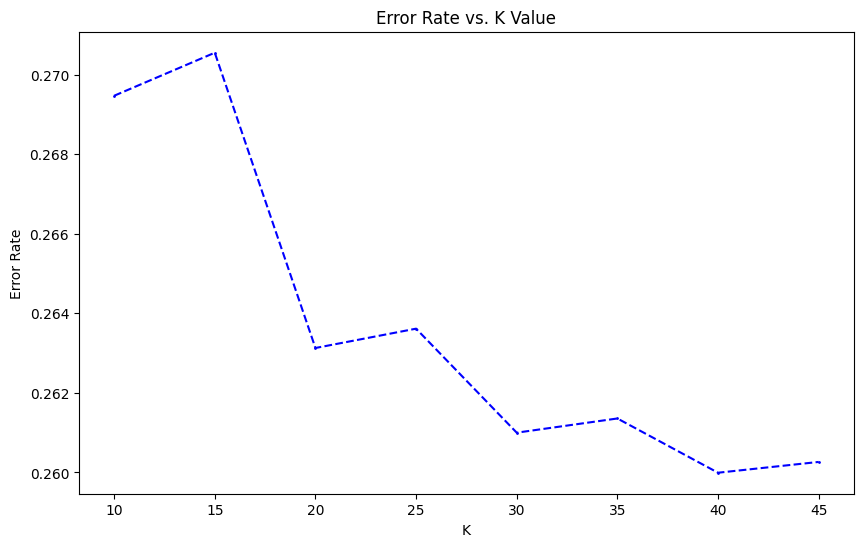

In [28]:
# Plotting the error rate
plt.figure(figsize=(10,6))

plt.plot(k_range,error_rate, color= 'blue', linestyle= 'dashed', marker= 'o', markerfacecolor='red', markersize=1)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

K = 40, optimum

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

'''X_train, X_test, y_train, y_test = train_test_split(df[Selected_Features], df['UCR_PART'], test_size=0.3, random_state=1)'''

knn_40 = KNeighborsClassifier(n_neighbors=40)
knn_40.fit(X_train, y_train)
pred_train = knn_40.predict(X_train)
y_pred = knn_40.predict(X_test)
print('Test accuracy ', metrics.accuracy_score(y_train, pred_train))
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Test accuracy  0.742660682125007
Accuracy  0.7400058786975061
F1 score  0.6397353764533829


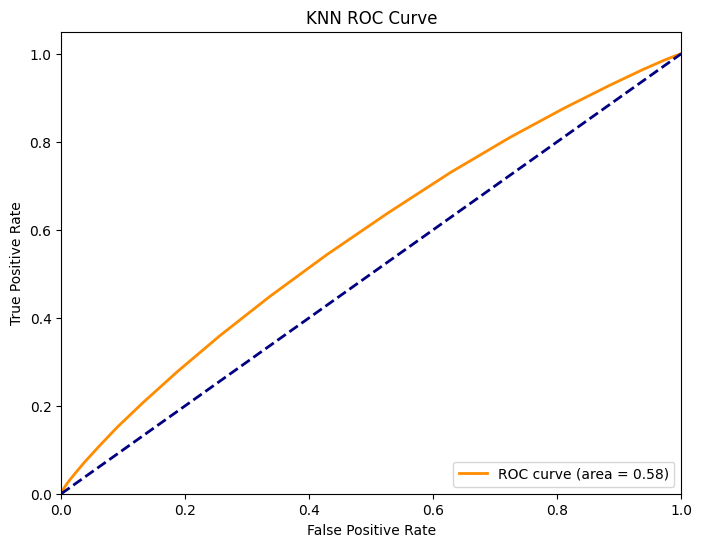

In [11]:
# 计算 ROC 曲线和 AUC
y_score = knn_40.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# 绘制 AUROC 图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('KNN ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [18]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5064197027527237

### KNN - Grid Search/ Random Search

In [29]:
KNeighborsClassifier().get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [30]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

grid_params = {
    'weights' : ['uniform', 'distance'],
    'metric' : ['manhattan','jaccard']
}

randomSearch = RandomizedSearchCV(
    KNeighborsClassifier(40),
    grid_params,
    verbose = 1,
    cv = 5,
    random_state = 1
    )

rs_results = randomSearch.fit(X_train, y_train)

c:\Users\ROG\.conda\envs\stat\lib\site-packages\sklearn\model_selection\_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 4 candidates, totalling 20 fits


## Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7406380400046707
F1 score  0.6302800394968827


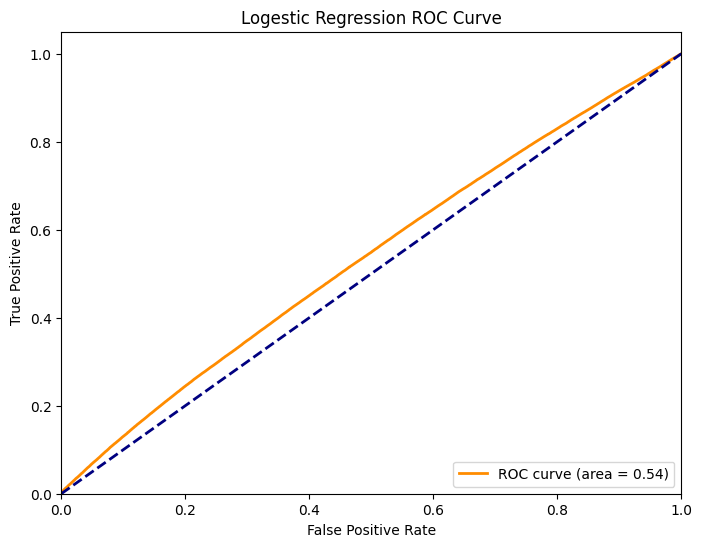

In [13]:
# 计算 ROC 曲线和 AUC
y_score = logreg.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# 绘制 AUROC 图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logestic Regression ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [11]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5

## Decision Tree

In [14]:
from sklearn.tree import DecisionTreeClassifier

# Fit decision tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.6453924030585333
F1 score  0.64853440029865


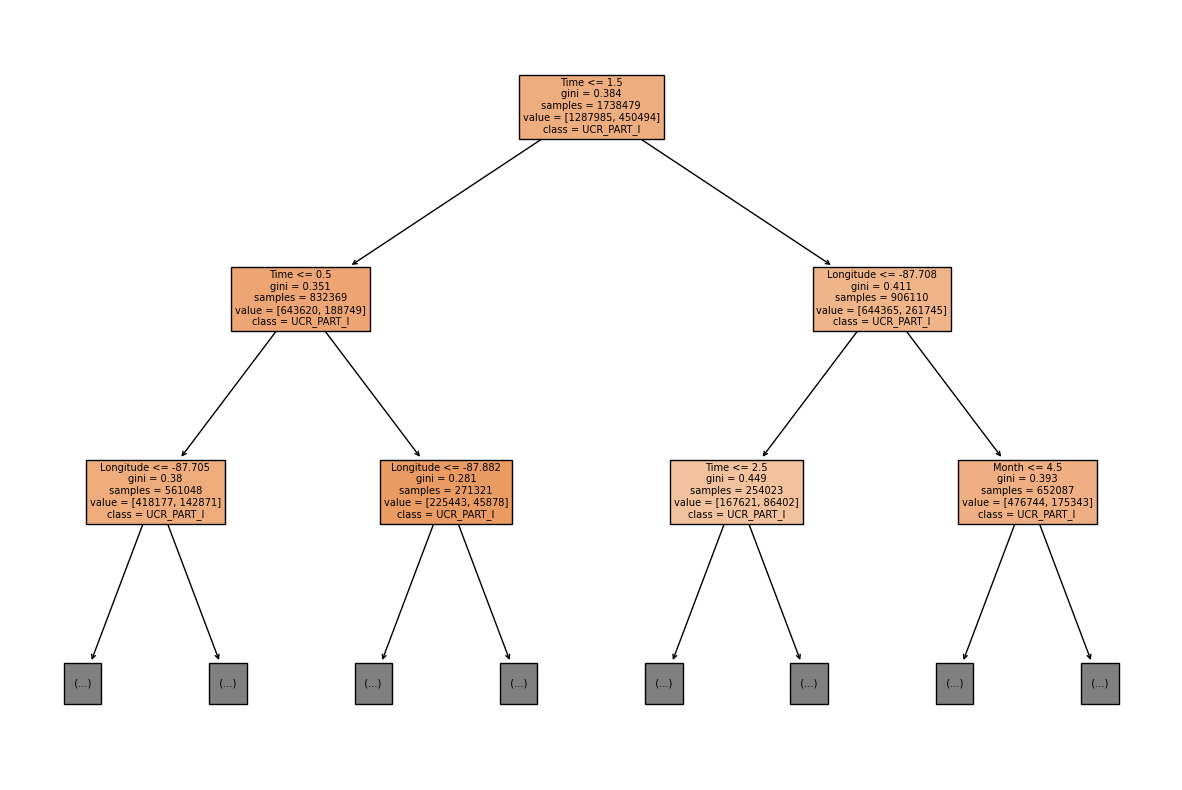

In [12]:
from sklearn import tree
import matplotlib.pyplot as plt


plt.figure(figsize=(15,10))
tree.plot_tree(clf, max_depth=2, filled=True, feature_names=Selected_Features, class_names=['UCR_PART_I', 'UCR_PART_II'])
plt.show()

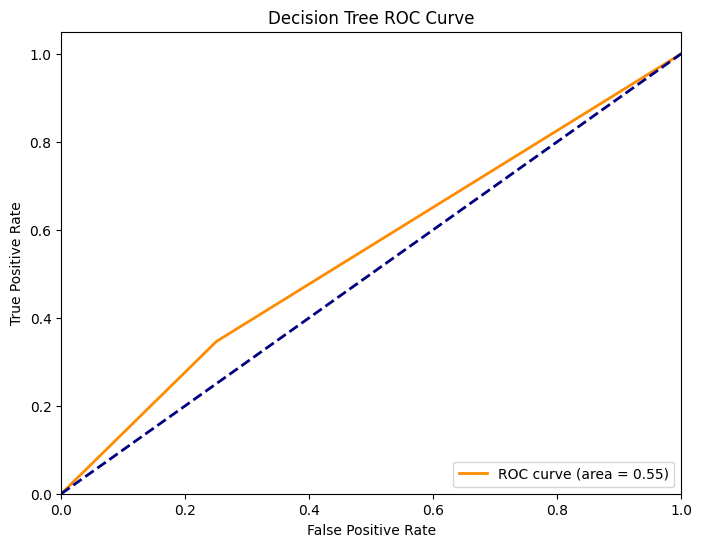

In [15]:
# 计算 ROC 曲线和 AUC
y_score = clf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# 绘制 AUROC 图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Decision Tree ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [7]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.5478061955304088

In [8]:
# plot the decision tree
from pydotplus.graphviz import graph_from_dot_data

from sklearn.tree import export_graphviz

dot_data = export_graphviz(clf, filled=True, rounded=True, class_names=['UCR_PART_I', 'UCR_PART_II'], feature_names=Selected_Features, out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('D:\HKU\STAT4710\decision_tree.png')


## Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.7323702827814561
F1 score  0.6803436946334553


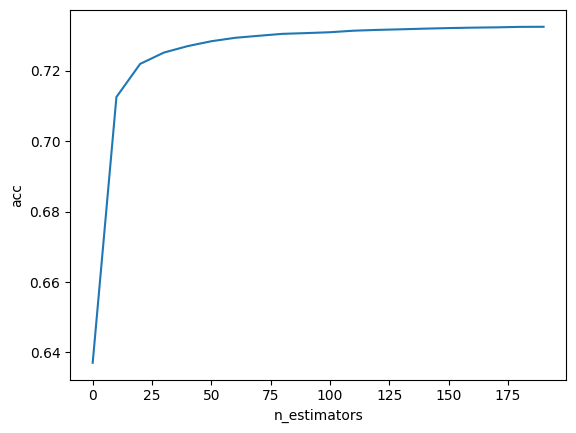

best n_estimators: 191


In [17]:
# n_estimators
from sklearn.model_selection import cross_val_score

cross = []
for i  in range(0,200,10):
    rf = RandomForestClassifier(n_estimators=i+1, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(0,200,10),cross)
plt.xlabel('n_estimators')
plt.ylabel('acc')
plt.show()
best_n_estimators = np.argmax(cross)*10+1
print('best n_estimators:', best_n_estimators)

In [6]:
best_n_estimators = 191

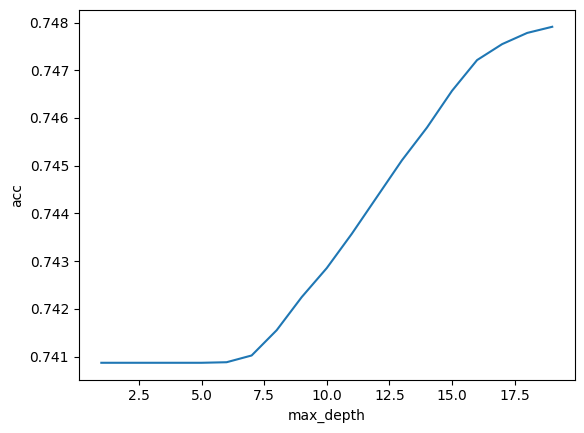

best max_depth: 19


In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# max_depth
cross = []
for i  in range(1,20):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,20),cross)
plt.xlabel('max_depth')
plt.ylabel('acc')
plt.show()
best_max_depth = np.argmax(cross)+1
print('best max_depth:', best_max_depth)

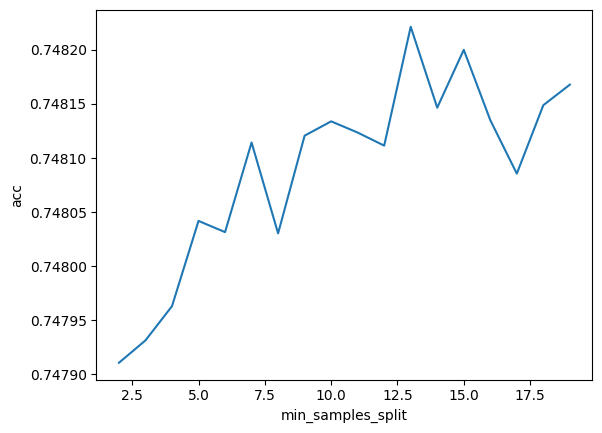

best min_samples_split: 13


In [10]:
# min_samples_split
cross = []
for i  in range(2,20):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(2,20),cross)
plt.xlabel('min_samples_split')
plt.ylabel('acc')
plt.show()
best_min_samples_split = np.argmax(cross)+2
print('best min_samples_split:', best_min_samples_split)

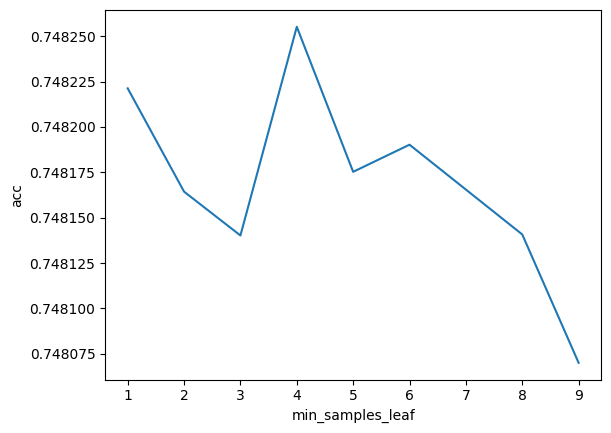

best min_samples_leaf: 4


In [11]:
# min_samples_leaf
cross = []
for i  in range(1,10):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,10),cross)
plt.xlabel('min_samples_leaf')
plt.ylabel('acc')
plt.show()
best_min_samples_leaf = np.argmax(cross)+1
print('best min_samples_leaf:', best_min_samples_leaf)

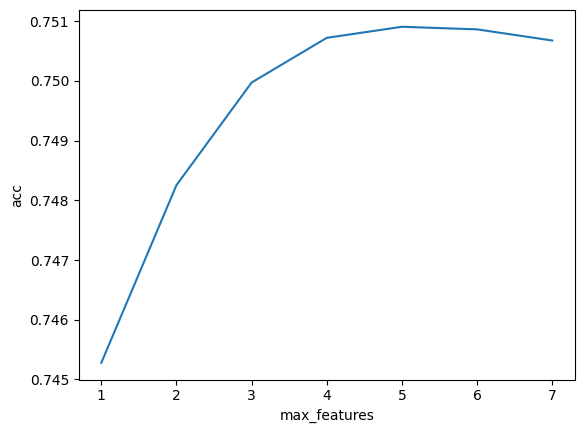

best max_features: 5


In [12]:
# max_features
cross = []
for i  in range(1,8):
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(range(1,8),cross)
plt.xlabel('max_features')
plt.ylabel('acc')
plt.show()
best_max_features = np.argmax(cross)+1
print('best max_features:', best_max_features)

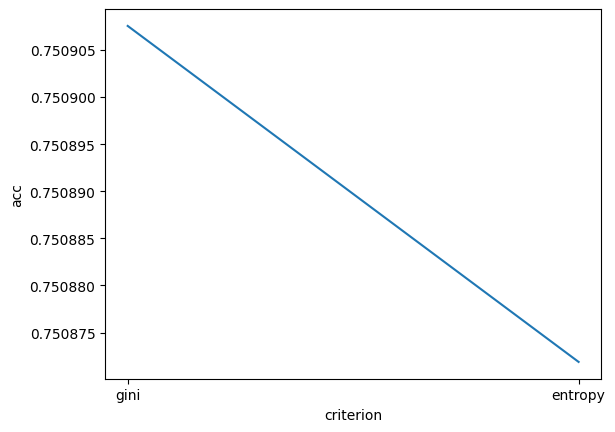

best criterion: gini


In [13]:
# criterion
cross = []
for i  in ['gini','entropy']:
    rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=i, n_jobs=-1,random_state=1)
    cross_score = cross_val_score(rf, X_train, y_train, cv=5).mean()
    cross.append(cross_score)
plt.plot(['gini','entropy'],cross)
plt.xlabel('criterion')
plt.ylabel('acc')
plt.show()
best_criterion = np.argmax(cross)
print('best criterion:', ['gini','entropy'][best_criterion])

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

rf = RandomForestClassifier(n_estimators=191,max_depth=19,min_samples_split=13,min_samples_leaf=4,max_features=5,criterion='gini', n_jobs=-1,random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))
print('ROC AUC score ', roc_auc_score(y_test, y_pred))

Accuracy  0.751937755599191
F1 score  0.6734426161442396
ROC AUC score  0.536376145093849


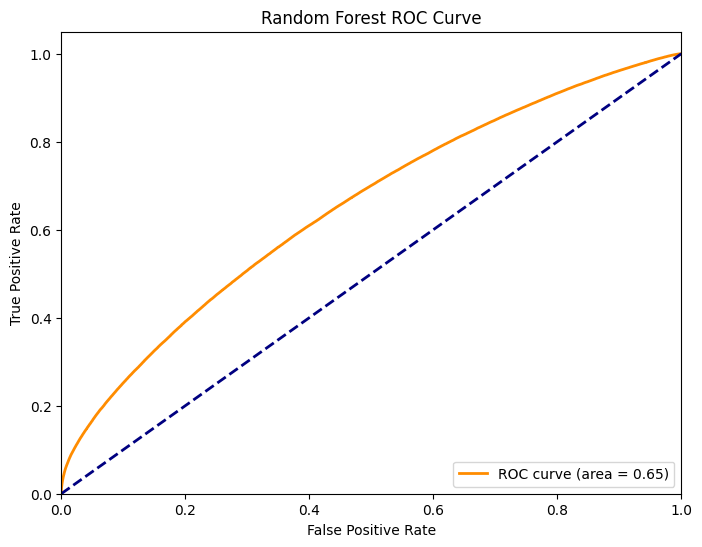

In [17]:
# 计算 ROC 曲线和 AUC
y_score = rf.predict_proba(X_test)[:, 1]
fpr, tpr, _ = metrics.roc_curve(y_test, y_score)
auc = metrics.roc_auc_score(y_test, y_score)

# 绘制 AUROC 图
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc="lower right")
plt.show()

### Oversmapling - SMOTE

In [14]:
from imblearn.over_sampling import SMOTE

# Oversample 'Minority'
sm = SMOTE(sampling_strategy='minority', random_state=1)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

target_count = y_train_res.value_counts()
print(target_count)

UCR_PART
0    1287985
1    1287985
Name: count, dtype: int64


In [15]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=['gini','entropy'][best_criterion], n_jobs=-1,random_state=1)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.6276945707946845
F1 score  0.646380237426556


In [16]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_pred)

0.591502891074431

Oversampling the Minority classes do not help with an increase in accuracy and F1 score

### Undersampling - Cluster Centroids

In [17]:
'''from imblearn.under_sampling import ClusterCentroids

# Undersample 'Majority'
cc = ClusterCentroids(sampling_strategy='majority', random_state=1)
X_train_res, y_train_res = cc.fit_resample(X_train, y_train)
target_count = y_train_res.value_counts()
print(target_count)'''

"from imblearn.under_sampling import ClusterCentroids\n\n# Undersample 'Majority'\ncc = ClusterCentroids(sampling_strategy='majority', random_state=1)\nX_train_res, y_train_res = cc.fit_resample(X_train, y_train)\ntarget_count = y_train_res.value_counts()\nprint(target_count)"

In [18]:
'''from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=['gini','entropy'][best_criterion], n_jobs=-1,random_state=1)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))'''

"from sklearn.ensemble import RandomForestClassifier\n\nrf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=['gini','entropy'][best_criterion], n_jobs=-1,random_state=1)\nrf.fit(X_train_res, y_train_res)\ny_pred = rf.predict(X_test)\nprint('Accuracy ', metrics.accuracy_score(y_test, y_pred))\nprint('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))"

Undersampling the Majority classes do not help with an increase in accuracy and F1 score

### Random Oversampling

In [19]:
from imblearn.over_sampling import RandomOverSampler

# Oversample 'Minority'
ros = RandomOverSampler(sampling_strategy='minority', random_state=1)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)
target_count = y_train_res.value_counts()
print(target_count)

UCR_PART
0    1287985
1    1287985
Name: count, dtype: int64


In [20]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=['gini','entropy'][best_criterion], n_jobs=-1,random_state=1)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.6497732406521328
F1 score  0.6643444737311974


### Random Undersampling

In [21]:
from imblearn.under_sampling import RandomUnderSampler

# Undersample 'Majority'
rus = RandomUnderSampler(sampling_strategy='majority', random_state=1)
X_train_res, y_train_res = rus.fit_resample(X_train, y_train)
target_count = y_train_res.value_counts()
print(target_count)

UCR_PART
0    450494
1    450494
Name: count, dtype: int64


In [22]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=best_n_estimators,max_depth=best_max_depth,min_samples_split=best_min_samples_split,min_samples_leaf=best_min_samples_leaf,max_features=best_max_features,criterion=['gini','entropy'][best_criterion], n_jobs=-1,random_state=1)
rf.fit(X_train_res, y_train_res)
y_pred = rf.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

Accuracy  0.6035690941571384
F1 score  0.6274342427583696


## SVM

In [7]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))

## XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_test)
print('Accuracy ', metrics.accuracy_score(y_test, y_pred))
print('F1 score ', metrics.f1_score(y_test, y_pred, average = 'weighted'))